In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity

pad = 2
stride = 1
마스크 사이즈 = (3, 3)
패드 = 2
인풋 이미지 사이즈 : (280, 450, 3)
아웃풋 이미지 사이즈 : (282, 452, 3)
패딩_인풋 이미지 사이즈 : (284, 454, 3)
패딩_인풋 이미지 사이즈(채널) : (284, 454)
아웃풋 이미지 사이즈(채널) : (282, 452)


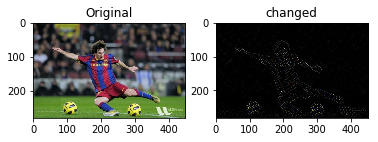

In [2]:
#def convolve(image, kernel, padding, stride):
padding = 2 #pad 수
stride = 1 #stride 수

image = cv2.imread('messi5.jpg') #원본 이미지 불러오기
(input_H, input_W, iput_C) = image.shape[0:3] #(.shape:차원별 크기 구하기) 각각 길이,높이,채널수 변수에 대입

kernel = np.array([[1,0,-1],[0,0,0],[-1,0,1]]) #필터 임의 지정
(kernel_H, kernel_W) = kernel.shape[0:2] #필터(2차원)이므로 각각 길이,높이에 대입

output_H=int((input_H+2*padding-kernel_H)/stride+1) #아웃풋(3차원)의 길이,높이,채널수 변수 지정
output_W=int((input_W+2*padding-kernel_W)/stride+1) #패딩하기 전 원본이미지에서 미리 계산해야함
output_C=image.shape[2] #인풋 이미지의 채널수대로 split, 컨볼루션 후 아웃풋변수에 대입, merge 해야 하므로 인풋과 채널수 동일하게 설정 

output=np.zeros((output_H, output_W, output_C), dtype="float32") #컨볼루션한 각 채널이 들어갈 아웃풋 채널별 변수를 만들기 위해 0행렬 배열 미리 만들기

image_paded = cv2.copyMakeBorder(image, padding, padding, padding, padding,cv2.BORDER_REPLICATE) #이미지 패딩, 반사 모양 으로

b,g,r = cv2.split(image_paded) #패딩한 원본 이미지를 채널별로 쪼개기
output_b,output_g,output_r = cv2.split(output) #위에서 만든 0행렬 배열(아웃풋 이미지)를 채널별로 쪼개기

for y in np.arange(0, output_H, stride): #y값에 0부터 output_H-1까지 stride칸씩 이동하면서 정수 대입
    for x in np.arange(0, output_W, stride):
        roi = b[y:kernel_H+y , x:kernel_W+x] #패딩된 원본 이미지에서 필터크기와 같은 칸을 0,0좌표부터 이동하며 추출 (곱셈 연산을 위해)
        k = (roi*kernel).sum()#추출된 roi(x행y열)와 지정된 필터(x행y열)를 곱한 후 나오는 x행y열 행렬의 성분을 단순 덧셈
        if (k<0): 
            output_b[y, x] = 0 #k가 -값인 경우, 0~255의 정수 배열인 BGR 형식에 비정상적으로 들어감
        else: #*단순 0처리뿐만 방법이 아니라, k가 -값인 경우 +255를 하던, 여러가지 방법으로 조작 가능*
            output_b[y, x] = k #k가 0이 아닌 경우 아웃풋(b채널)에 대입

for y in np.arange(0, output_H, stride): #동일 연산을 패딩된 인풋이미지(g채널)에 적용 후 아웃풋(g채널)에 대입
    for x in np.arange(0, output_W, stride):
        roi = g[y:kernel_H+y , x:kernel_W+x]
        k = (roi*kernel).sum()
        if (k<0):
            output_g[y, x] = 0
        else:
            output_g[y, x] = k

for y in np.arange(0, output_H, stride): #동일 연산을 패딩된 인풋이미지(r채널)에 적용 후 아웃풋(r채널)에 대입
    for x in np.arange(0, output_W, stride):
        roi = r[y:kernel_H+y , x:kernel_W+x]
        k = (roi*kernel).sum()
        if (k<0):
            output_r[y, x] = 0
        else:
            output_r[y, x] = k

print("pad = " + str(padding))
print("stride = " + str(stride))
print("마스크 사이즈 = " + str(kernel.shape))
print("패드 = " + str(padding))
print("인풋 이미지 사이즈 : " + str(image.shape))
print("아웃풋 이미지 사이즈 : " + str(output.shape))
print("패딩_인풋 이미지 사이즈 : " + str(image_paded.shape))    
print("패딩_인풋 이미지 사이즈(채널) : " + str(b.shape))
print("아웃풋 이미지 사이즈(채널) : " + str(output_b.shape))

output=cv2.merge((output_b.astype('uint8'),output_g.astype('uint8'),output_r.astype('uint8')))
#아웃풋 r,g,b 채널을 합해 3차원 구조로 merge
#여기서 합쳐진 output은 위에서 영행렬 배열을 만들때 플로팅 형식으로 지정해줬으므로
#각각의 아웃풋 채널들을 합치기 전에 unsigned(부호 없는) 8bit로 형변환

plt.subplot(121),plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(122),plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB)),plt.title('changed')
plt.show()

#return output